# C-H···H-C Bond Analysis from all PDB NMR files

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

Read the results file

In [3]:
contacts = pickle.load(open("hhcontacts.pkl", 'rb'))
contacts.head()

,H1,H2,PDBid,angle1,angle2,dihedral,distance,res1name,res1num,res2name,res2num
0,HB3,HB,1zll,109.210561,153.077080,-93.374117,2.921670,MET,1,VAL,4
1,HG2,HB,1zll,111.368005,112.449970,-148.362221,2.303411,MET,1,VAL,4
2,HG2,HG22,1zll,112.619339,97.521295,160.227188,2.325773,MET,1,VAL,4
3,HG2,HG23,1zll,153.594525,84.877194,46.860788,2.561777,MET,1,VAL,4
4,HE2,HG22,1zll,107.549297,167.897272,134.889135,2.764146,MET,1,VAL,4


### Number of contacts found

In [4]:
len(contacts)

577998

### Number of unique PDBs with contacts

In [5]:
len(np.unique(contacts['PDBid']))

9315

### Analyze distance and angle distribution

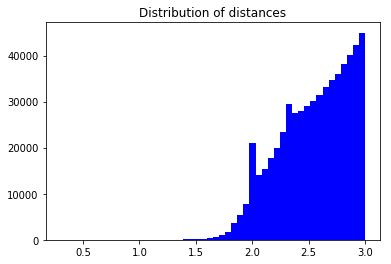

In [6]:
plt.hist(contacts['distance'], color="b", bins=50)
plt.title("Distribution of distances")
plt.show()

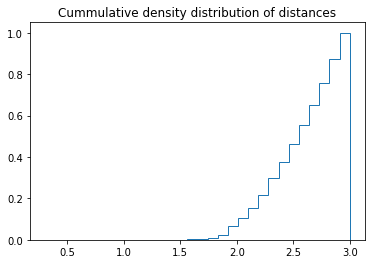

In [7]:
plt.hist(contacts['distance'], density=1, histtype='step', cumulative=True, bins=30)
plt.title("Cummulative density distribution of distances")
plt.show()

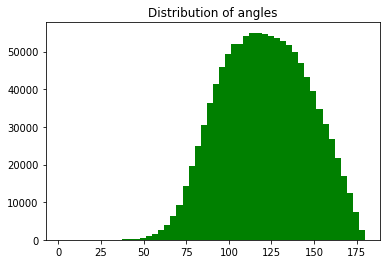

In [8]:
all_angles = np.concatenate([contacts['angle1'], contacts['angle2']])
plt.hist(all_angles, color="g", bins=50)
plt.title("Distribution of angles")
plt.show()

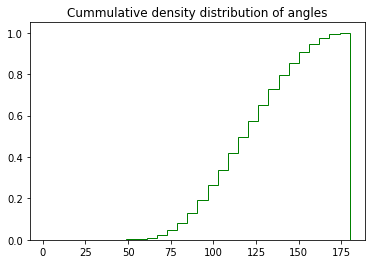

In [9]:
plt.hist(all_angles, density=1, histtype='step', cumulative=True, bins=30, color='g')
plt.title("Cummulative density distribution of angles")
plt.show()

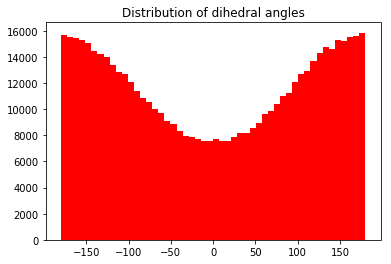

In [10]:
plt.hist(contacts['dihedral'], color="r", bins=50)
plt.title("Distribution of dihedral angles")
plt.show()

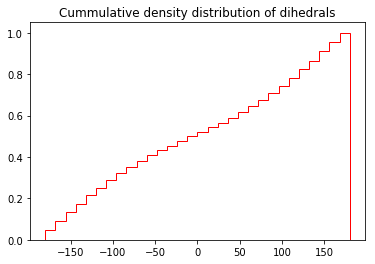

In [11]:
plt.hist(contacts['dihedral'], density=1, histtype='step', cumulative=True, bins=30, color='r')
plt.title("Cummulative density distribution of dihedrals")
plt.show()

In [17]:
# Ugly hack below. :( We want a unique identifier for each residue pair.
# Make a list of alphabetically sorted concatenated residue pairs.
pairs = [sorted((i[0], i[1])) for i in list(zip(contacts.res1name, contacts.res2name))]
pair_ids = sorted([pair[0] + "-" + pair[1] for pair in pairs])

print("Number of unique pairs:", len(np.unique(np.array(pair_ids))))

Number of unique pairs: 15


### Fquency of H···H contacts for all combinations of residues

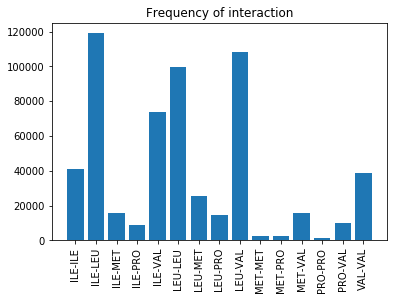

In [24]:
labels, counts = np.unique(pair_ids, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title("Frequency of interaction")
plt.xticks(rotation=90)
plt.show()